In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Uyarıları görmezden gelmek için kullanılır

from tensorflow import keras
from tensorflow.keras.models import Sequential
# tensorflow.keras.models'tan Sequential modelini içe aktarır
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape, BatchNormalization
# Dense, tam bağlantılı (fully connected) katmanları oluşturmak için kullanılır.
# Conv2D, evrişimli sinir ağı (Convolutional Neural Network - CNN) mimarisi içinde kullanılan 2 boyutlu evrişim katmanlarını oluşturmak için kullanılır. 
# MaxPooling2D, girdi görüntünün boyutunu küçültmek ve özelliklerin daha genel bir temsilini elde etmek için en büyük değerleri koruyarak alt örnekleme yapar.
# Flatten, çok boyutlu verileri düzleştirerek (flatten) tek boyutlu bir vektöre dönüştürmek için kullanılır.
# InputLayer, modelin giriş katmanını belirtmek için kullanılır. Giriş katmanı, modelin veriye ne tür bir şekilde uyum sağlayacağını belirler.
# Reshape,verinin şeklini değiştirmek için kullanılır. Özellikle, verinin boyutunu ve şeklini değiştirmek için kullanılır.
# BatchNormalization, modelin eğitimi sırasında ağırlıkları ve bias'ları normalize etmek için kullanılır. Bu, modelin daha hızlı ve daha istikrarlı bir şekilde eğitilmesine yardımcı olabilir.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Bu, veri artırma yöntemlerini kullanarak mevcut görüntü verilerini çeşitlendirmeyi sağlar.



In [89]:
img_load = ImageDataGenerator(rescale = 1.0 / 255)

train_data = img_load.flow_from_directory('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/',
                                        target_size=(256,256),
                                        batch_size=32,
                                        color_mode='rgb',
                                        class_mode='binary')

test_data = img_load.flow_from_directory('/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/',
                                        target_size=(256,256),
                                        batch_size=10,
                                        color_mode='rgb',
                                        class_mode='binary')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


images, labels = next(train_data)
plt.imshow(images[3])
plt.axis('off')
plt.show()

## Normalize

In [90]:
#images = images / 255

In [91]:
#images[0].shape

In [92]:
#images[0]

## CNN Model

In [100]:
model = Sequential()
model.add(InputLayer(input_shape = (256, 256, 3)))
model.add(Reshape(target_shape = (256, 256, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = 'adam',
              metrics = 'accuracy')

In [101]:
history = model.fit(train_data, epochs = 10)

Epoch 1/10
5/5 [==============================] - 12s 2s/step - loss: 0.8260 - accuracy: 0.5135
Epoch 2/10
5/5 [==============================] - 11s 2s/step - loss: 0.6780 - accuracy: 0.4932
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 0.5813 - accuracy: 0.8851
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 0.4360 - accuracy: 0.8986
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 0.3246 - accuracy: 0.8514
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 0.1558 - accuracy: 0.9595
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 0.1537 - accuracy: 0.9392
Epoch 8/10
5/5 [==============================] - 11s 2s/step - loss: 0.1201 - accuracy: 0.9459
Epoch 9/10
5/5 [==============================] - 11s 2s/step - loss: 0.0600 - accuracy: 0.9797
Epoch 10/10
5/5 [==============================] - 11s 2s/step - loss: 0.0607 - accuracy: 0.9797


In [102]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_11 (Reshape)        (None, 256, 256, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 60, 60, 64)      

In [103]:
#test_images, test_labels = next(test_data)

In [104]:
model.evaluate(test_data)

4/4 [==============================] - 1s 275ms/step - loss: 0.0145 - accuracy: 1.0000


[0.014485633000731468, 1.0]

<Axes: >

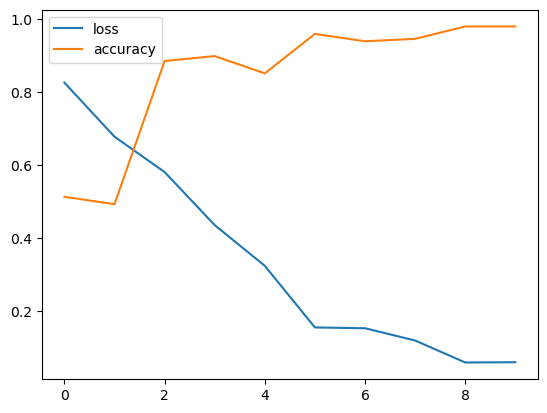

In [105]:
result = pd.DataFrame(history.history)
result.plot()

In [106]:
sonuc = pd.DataFrame(history.history)
sonuc

,loss,accuracy
0,0.825988,0.513514
1,0.677998,0.493243
2,0.581265,0.885135
3,0.435997,0.898649
4,0.324557,0.851351
5,0.155844,0.959459
6,0.153694,0.939189
7,0.120109,0.945946
8,0.059951,0.979730
9,0.060676,0.979730


In [107]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [108]:
test_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

1/1 [==============================] - 0s 179ms/step


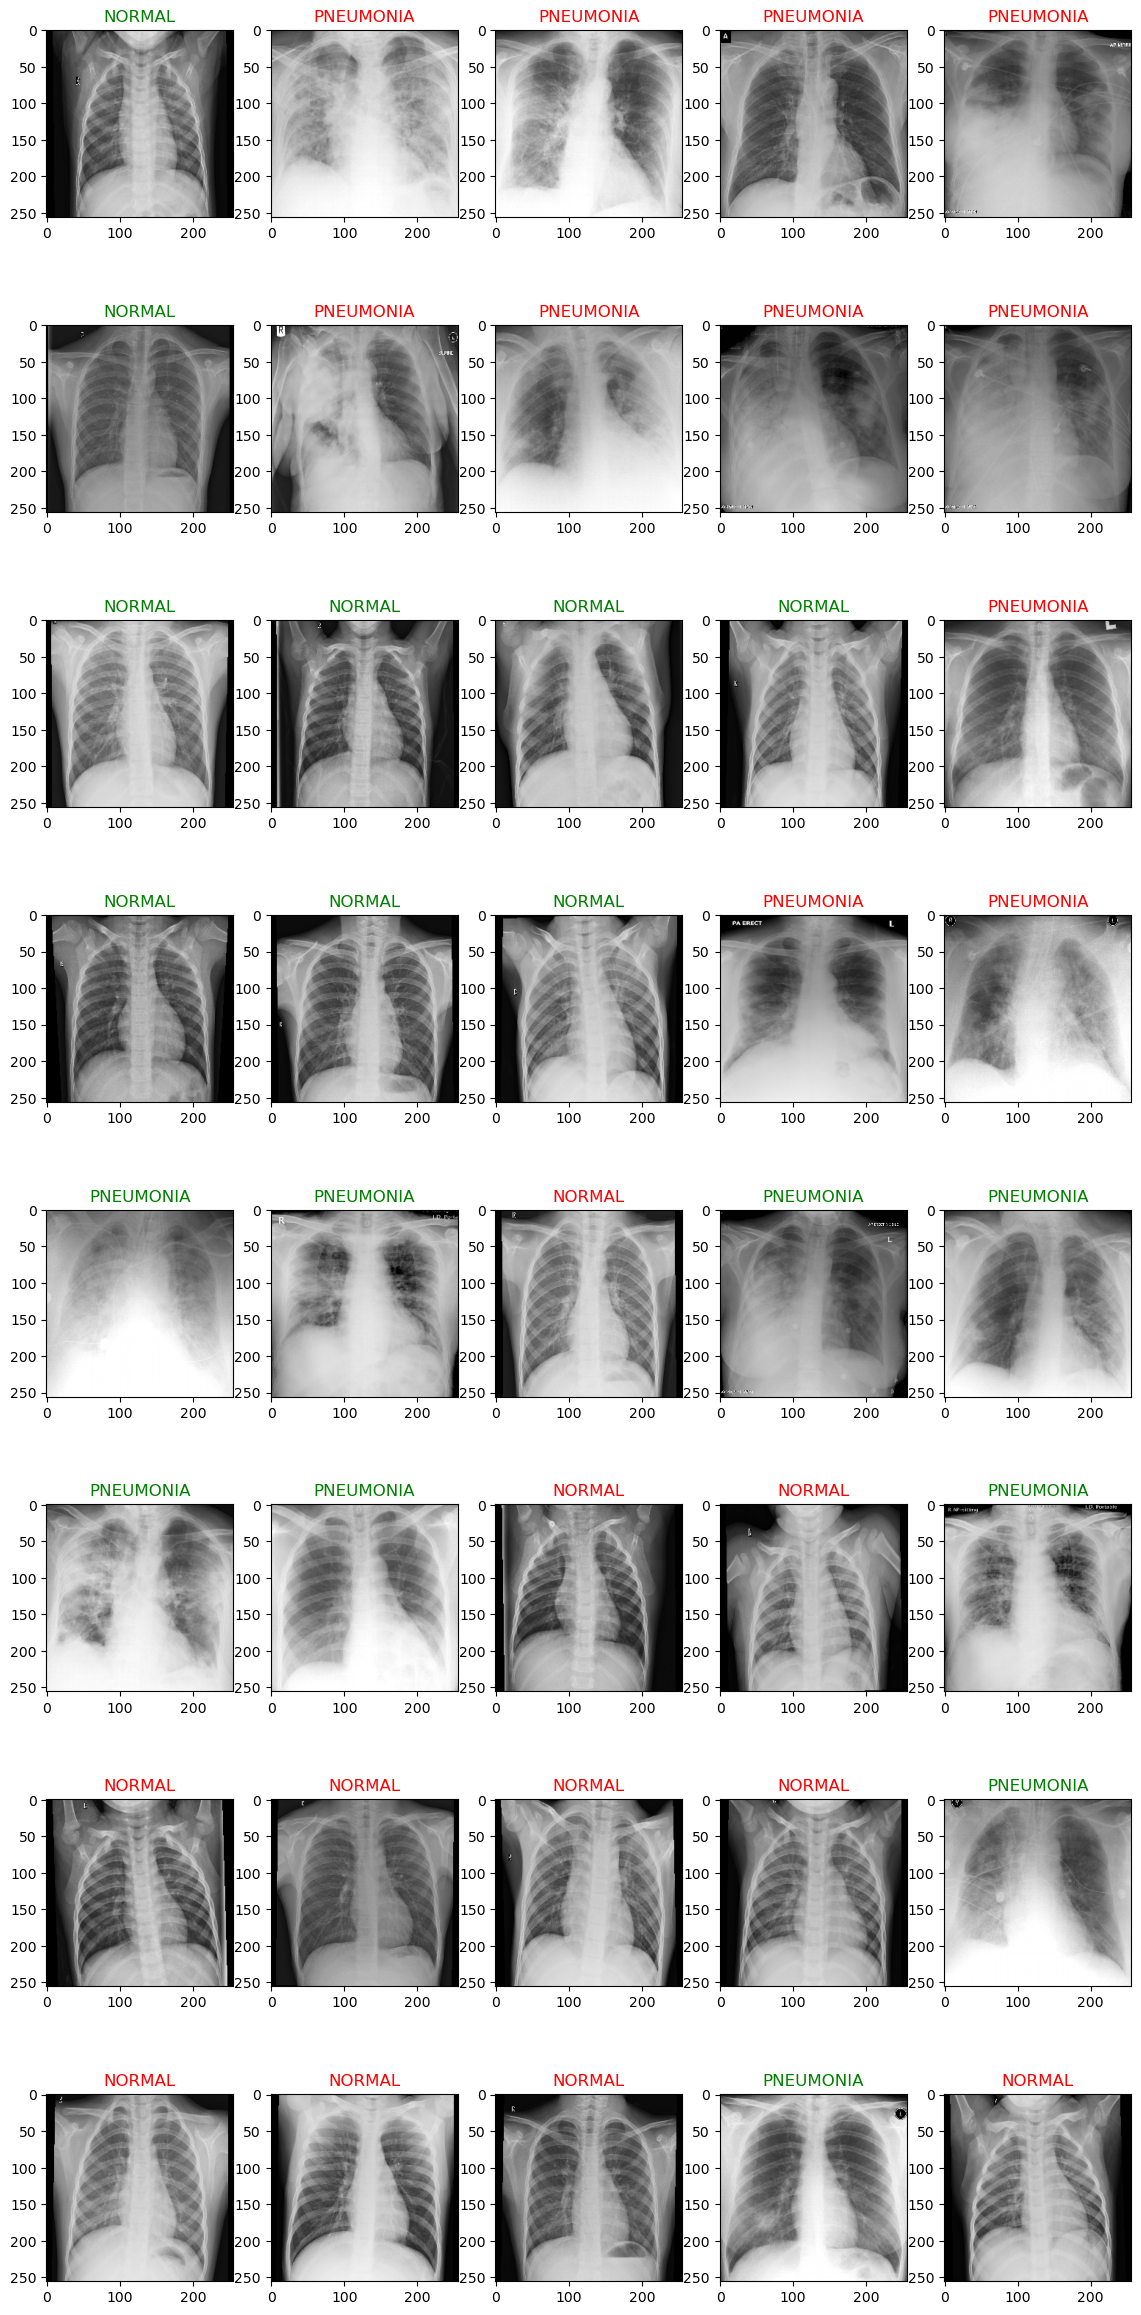

In [109]:
labels_name = ['NORMAL','PNEUMONIA']
plt.figure(figsize=(14, 30))
for i in range(4) :
    pred = model.predict(test_data[i][0])
    for j in range(len(pred)) :
        plt.subplot(8, 5, (10*i)+j+1)
        plt.imshow(test_data[i][0][j])
        
        if pred[j] < 0.5 :
            labels_pred = 0

        else :
            labels_pred = 1
            
        if labels_pred == test_data.labels[(10*i) + j] :
            plt.setp(plt.title(labels_name[labels_pred]), color = 'g')
        else :
            plt.setp(plt.title(labels_name[labels_pred]), color = 'r')

In [112]:
tahmin = model.predict_generator(test_data) > 0.5

In [114]:
accuracy_score(tahmin, test_data.labels)

0.6